# TP 1 : pré-traitement des données et visualisation

Nous allons travailler sur le jeu de données `gro.csv` pour faire du **credit scoring**, qui a été proposé il y a quelques années sur un site de data challenge. C'est un vrai de jeu qui contient des données avec différents types de variable, des valeurs manquantes, etc. Nous devons donc faire un gros travail de préparation de données.
Les données contiennent les colonnes suivantes :

| Nom de la colonne    | Description |
|:---------------------|:------------|
| BirthDate            | Date of birth of the client |
| Customer_Open_Date   | Creation date of the client's first account at the bank |
| Customer_Type        | Type of client (existing / new) | 
| Educational_Level    | Highest diploma |
| Id_Customer          | Id of the client |
| Marital_Status       | Family situation |
| Nb_Of_Products       | Number of products held by the client |
| Net_Annual_Income    | Annual revenue |
| Number_Of_Dependant  | Number of dependents |
| P_Client             | Non-disclosed feature |
| Prod_Category        | Product category |
| Prod_Closed_Date     | Closing date of the last product |
| Prod_Decision_Date   | Decision date of the last agreement for a financing product |
| Prod_Sub_Category    | Sub-category of the product |
| Source               | Financing source (Branch or Sales) |
| Type_Of_Residence    | Residential situation |
| Y                    | Credit was granted (yes / no) |
| Years_At_Business    | Number of year at the current job position |
| Years_At_Residence   | Number of year at the current housing |

## Ce que vous avez à faire
Charger les données `gro.csv` et travailler dessus en utilisant `pandas`, `matplotlib` 
et `seaborn`. 

# 1. Première importation des données

On commence par importer les données via `pd.read_csv` en changeant le séparateur par défaut.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
%matplotlib inline

sns.set_context("notebook", font_scale=1.2)


In [3]:
filename = "./gro.csv"
df = pd.read_csv(filename, sep=';')
df.head(n=5)

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,...,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,6714,0,Non Existing Client,02/09/1971,18/01/2012,NP_Client,University,Married,3.0,10,...,C,23/01/2012,Sales,Owned,1,NaN,B,NaN,NaN,NaN
1,7440,0,Non Existing Client,07/08/1977,13/02/2012,NP_Client,University,Married,3.0,1,...,C,14/02/2012,Sales,Owned,1,NaN,B,NaN,NaN,NaN
2,573,0,Existing Client,13/06/1974,04/02/2009,P_Client,University,Married,0.0,12,...,C,30/06/2011,Sales,Parents,1,NaN,G,NaN,NaN,NaN
3,9194,0,Non Existing Client,07/11/1973,03/04/2012,NP_Client,University,Married,2.0,10,...,C,04/04/2012,Sales,Owned,1,NaN,B,NaN,NaN,NaN
4,3016,1,Existing Client,08/07/1982,25/08/2011,NP_Client,University,Married,3.0,3,...,C,07/09/2011,Sales,New rent,1,31/12/2012,L,NaN,NaN,NaN


In [4]:
df.columns

Index(['Id_Customer', 'Y', 'Customer_Type', 'BirthDate', 'Customer_Open_Date',
       'P_Client', 'Educational_Level', 'Marital_Status',
       'Number_Of_Dependant', 'Years_At_Residence', 'Net_Annual_Income',
       'Years_At_Business', 'Prod_Sub_Category', 'Prod_Decision_Date',
       'Source', 'Type_Of_Residence', 'Nb_Of_Products', 'Prod_Closed_Date',
       'Prod_Category', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')

**Remarque**. Il y a des colonnes qui semblent vides à la fin. Elles n'apparraisent sur la description des données.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6725 entries, 0 to 6724
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id_Customer          6725 non-null   int64  
 1   Y                    6725 non-null   int64  
 2   Customer_Type        6725 non-null   object 
 3   BirthDate            6725 non-null   object 
 4   Customer_Open_Date   6725 non-null   object 
 5   P_Client             6725 non-null   object 
 6   Educational_Level    6725 non-null   object 
 7   Marital_Status       6725 non-null   object 
 8   Number_Of_Dependant  6723 non-null   float64
 9   Years_At_Residence   6725 non-null   int64  
 10  Net_Annual_Income    6722 non-null   object 
 11  Years_At_Business    6721 non-null   float64
 12  Prod_Sub_Category    6725 non-null   object 
 13  Prod_Decision_Date   6725 non-null   object 
 14  Source               6725 non-null   object 
 15  Type_Of_Residence    6725 non-null   o

In [6]:
df["BirthDate"].head()

0    02/09/1971
1    07/08/1977
2    13/06/1974
3    07/11/1973
4    08/07/1982
Name: BirthDate, dtype: object

In [7]:
type(df.loc[0, 'BirthDate'])

str

Cela signifie que les dates ont été importées comme des chaînes de caractère...

In [8]:
df['Prod_Sub_Category'].head()

0    C
1    C
2    C
3    C
4    C
Name: Prod_Sub_Category, dtype: object

In [9]:
type(df.loc[0, 'Prod_Sub_Category'])

str

Même chose pour les colonnes catégorielles.

In [10]:
df['Net_Annual_Income'].head(n=10)

0        36
1        36
2        18
3        36
4        36
5    59,916
6        36
7        60
8        36
9        36
Name: Net_Annual_Income, dtype: object

In [11]:
type(df.loc[0, 'Net_Annual_Income'])

str

Le revenu net réel (Net actual income) a également été importé comme une chaîne de caractère

In [12]:
df.describe(include='all')

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,...,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category,Unnamed: 19,Unnamed: 20,Unnamed: 21
count,6725.000000,6725.000000,6725,6725,6725,6725,6725,6725,6723.000000,6725.000000,...,6725,6725,6725,6725,6725.000000,1434,6725,0.0,0.0,0.0
unique,NaN,NaN,2,5224,1371,2,4,5,NaN,NaN,...,3,278,2,5,NaN,349,13,NaN,NaN,NaN
top,NaN,NaN,Non Existing Client,01/10/1984,12/12/2011,NP_Client,University,Married,NaN,NaN,...,C,06/12/2011,Sales,Owned,NaN,30/05/2013,B,NaN,NaN,NaN
freq,NaN,NaN,4214,8,50,6213,5981,5268,NaN,NaN,...,5783,58,5149,5986,NaN,116,3979,NaN,NaN,NaN
mean,4821.029740,0.072862,NaN,NaN,NaN,NaN,NaN,NaN,1.051614,12.564758,...,NaN,NaN,NaN,NaN,1.086840,NaN,NaN,NaN,NaN,NaN
std,2775.505395,0.259930,NaN,NaN,NaN,NaN,NaN,NaN,1.332712,9.986257,...,NaN,NaN,NaN,NaN,0.295033,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,2399.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,4.000000,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
50%,4822.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,10.000000,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
75%,7209.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,17.000000,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN


### Conclusion de cette première importation

Il va donc falloir travailler un peu plus pour corriger les problèmes suivants :
- Les trois dernières colonnes sont vides
- Les dates sont des `str` (type python pour les chaînes de caractère)
- Il y a de nombreuses valeurs manquantes
- Les colonnes catégorielles sont des `str`
- De même pour la colonne `Net_Annual_Income` 

En regardant la définition des colonnes, on peut inférer les types corrects de presque toutes les variables :

**Features continues**
- `Years_At_Residence`
- `Net_Annual_Income`
- `Years_At_Business`

**Features catégorielles*

- `Customer_Type`
- `P_Client`
- `Educational_Level`
- `Marital_Status`
- `Prod_Sub_Category`
- `Source`
- `Type_Of_Residence`
- `Prod_Category`

**Features dates**

- `BirthDate`
- `Customer_Open_Date`
- `Prod_Decision_Date`
- `Prod_Closed_Date`

**Features à étudier encore**

- `Number_Of_Dependant`
- `Nb_Of_Products`

# 2. Identification des problèmes et présentation des résultats

Il faut trouver une solution pour tous ces points

#### 2.1 Problème des 3 dernières colonnes

Il y a plusieurs `;` à la fin de chaque ligne`';'`. On va utiliser l'option `usecols` de `read_csv`.

#### 2.2 Problèmes avec les Dates

On va utiliser l'option `parse_dates` de `read_csv`.

In [13]:
type(df.loc[0, 'BirthDate'])

str

#### 2.3 Les données manquantes

On repère dans quelles colonnes sont les valeurs maquantes.

In [14]:
df.isnull().sum()

Id_Customer               0
Y                         0
Customer_Type             0
BirthDate                 0
Customer_Open_Date        0
P_Client                  0
Educational_Level         0
Marital_Status            0
Number_Of_Dependant       2
Years_At_Residence        0
Net_Annual_Income         3
Years_At_Business         4
Prod_Sub_Category         0
Prod_Decision_Date        0
Source                    0
Type_Of_Residence         0
Nb_Of_Products            0
Prod_Closed_Date       5291
Prod_Category             0
Unnamed: 19            6725
Unnamed: 20            6725
Unnamed: 21            6725
dtype: int64

C'est sur la colonne `Prod_Closed_Date` que se trouvent le plus grand nombre de valeurs manquantes, une solution est de la retirer

In [15]:
df[['Prod_Closed_Date']].head(5)

,Prod_Closed_Date
0,NaN
1,NaN
2,NaN
3,NaN
4,31/12/2012


In [16]:
df.drop(['Prod_Closed_Date', 'Unnamed: 19', 
         'Unnamed: 20', 'Unnamed: 21'], axis="columns", inplace=True)

In [17]:
df.head()

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Category
0,6714,0,Non Existing Client,02/09/1971,18/01/2012,NP_Client,University,Married,3.0,10,36,3.0,C,23/01/2012,Sales,Owned,1,B
1,7440,0,Non Existing Client,07/08/1977,13/02/2012,NP_Client,University,Married,3.0,1,36,1.0,C,14/02/2012,Sales,Owned,1,B
2,573,0,Existing Client,13/06/1974,04/02/2009,P_Client,University,Married,0.0,12,18,2.0,C,30/06/2011,Sales,Parents,1,G
3,9194,0,Non Existing Client,07/11/1973,03/04/2012,NP_Client,University,Married,2.0,10,36,1.0,C,04/04/2012,Sales,Owned,1,B
4,3016,1,Existing Client,08/07/1982,25/08/2011,NP_Client,University,Married,3.0,3,36,1.0,C,07/09/2011,Sales,New rent,1,L


On regarde où les données contiennent encore des valeurs manquantes

In [18]:
df[df.isnull().any(axis="columns")].style.highlight_null()

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Category
105,9407,0,Non Existing Client,17/05/1956,17/04/2012,NP_Client,University,Married,0.000000,1,36,nan,C,18/04/2012,Sales,Owned,1,D
793,8953,1,Existing Client,07/06/1990,20/09/2010,P_Client,University,Single,nan,21,"33,6",1.000000,C,18/04/2012,Branch,Owned,2,G
2349,9399,0,Non Existing Client,16/04/1968,17/04/2012,NP_Client,University,Married,0.000000,10,nan,10.000000,C,18/04/2012,Sales,Owned,1,B
2400,8826,0,Existing Client,03/01/1980,20/03/2005,NP_Client,University,Married,1.000000,8,nan,9.000000,C,17/04/2012,Branch,Owned,1,B
2484,398,0,Non Existing Client,14/05/1984,19/05/2011,NP_Client,Master/PhD,Single,0.000000,10,25,nan,C,26/05/2011,Branch,Owned,2,D
3438,5882,0,Non Existing Client,08/08/1981,14/12/2011,NP_Client,University,Married,0.000000,2,108,nan,C,27/12/2011,Branch,Owned,1,B
6307,9588,0,Existing Client,05/07/1950,18/09/2004,NP_Client,Master/PhD,Married,nan,10,50,10.000000,C,26/04/2012,Sales,Owned,1,B
6355,8777,0,Existing Client,10/09/1985,18/09/2003,NP_Client,Master/PhD,Single,0.000000,26,36,nan,C,19/03/2012,Branch,Owned,1,D
6431,9555,0,Non Existing Client,15/01/1951,23/04/2012,NP_Client,University,Married,0.000000,11,nan,0.000000,C,26/04/2012,Branch,Old rent,2,B


#### 2.4 Les features catégorielles sont des `str`

Il faut indiquer à pandas le type des variables via l'option `dtype` de `read_csv`.

In [19]:
type(df.loc[0, 'Prod_Sub_Category'])

str

In [20]:
df['Prod_Sub_Category'].unique()

array(['C', 'G', 'P'], dtype=object)

#### 2.5 Le revenu net importé comme une chaîne de caractère

Le problème est dû au fait que le séparateur décimal est en notation européenne (`,`). Il faut le spécifier à pandas en utilisant l'option `decimal` de `read_csv`. 

In [21]:
type(df.loc[0, 'Net_Annual_Income'])

str

In [22]:
df['Net_Annual_Income'].head(n=10)

0        36
1        36
2        18
3        36
4        36
5    59,916
6        36
7        60
8        36
9        36
Name: Net_Annual_Income, dtype: object

# 3 Une importation correcte des données

**Remarque : sur les colonnes contenant des entiers** Il faudrait les définir comme `int` malheureusement (pour l'instant) `pandas` ne supporte pas de colonnes quand elles contiennent des valeurs manquantes

Pour utiliser l'option `dtype` de `read_csv`, il faut définir un dictionnaire avec le type de chaque feature

In [23]:
gro_dtypes = {
    'Years_At_Residence': np.int,
    'Net_Annual_Income' : np.float,
    'Years_At_Business': np.float,
    'Number_Of_Dependant': np.float,
    'Nb_Of_Products': np.int,
    'Customer_Type': 'category',
    'P_Client': 'category',
    'Educational_Level': 'category',
    'Marital_Status': 'category',
    'Prod_Sub_Category': 'category',
    'Source': 'category',
    'Type_Of_Residence': 'category',
    'Prod_Category': 'category',
}

df = pd.read_csv(
    # Filename
    "gro.csv",
    # Column separator
    sep=';',
    # Decimal separator
    decimal=',',
    # Range of the columns to keep (remove the last three ones)
    usecols=range(19),
    # Which columns should be parsed as dates
    parse_dates=['BirthDate', 'Customer_Open_Date', 'Prod_Decision_Date', 
                 'Prod_Closed_Date'],
    # Specify some dtypes
    dtype=gro_dtypes
)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6725 entries, 0 to 6724
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id_Customer          6725 non-null   int64         
 1   Y                    6725 non-null   int64         
 2   Customer_Type        6725 non-null   category      
 3   BirthDate            6725 non-null   datetime64[ns]
 4   Customer_Open_Date   6725 non-null   datetime64[ns]
 5   P_Client             6725 non-null   category      
 6   Educational_Level    6725 non-null   category      
 7   Marital_Status       6725 non-null   category      
 8   Number_Of_Dependant  6723 non-null   float64       
 9   Years_At_Residence   6725 non-null   int64         
 10  Net_Annual_Income    6722 non-null   float64       
 11  Years_At_Business    6721 non-null   float64       
 12  Prod_Sub_Category    6725 non-null   category      
 13  Prod_Decision_Date   6725 non-nul

In [25]:
df['Prod_Sub_Category'].head()

0    C
1    C
2    C
3    C
4    C
Name: Prod_Sub_Category, dtype: category
Categories (3, object): ['C', 'G', 'P']

In [26]:
df['BirthDate'].head()

0   1971-02-09
1   1977-07-08
2   1974-06-13
3   1973-07-11
4   1982-08-07
Name: BirthDate, dtype: datetime64[ns]

In [27]:
df.loc[0, 'BirthDate']

Timestamp('1971-02-09 00:00:00')

On enlève (pour l'instant) `Prod_Closed_Date` (qui contient trop de valeurs manquantes)

In [28]:
prod_closed_date = df.pop('Prod_Closed_Date')
df.shape

(6725, 18)

On finit par enlever (pour l'instant) les lignes qui contiennent des valeurs manquantes

In [29]:
print(df.shape)
df = df.dropna()
print(df.shape)

(6725, 18)
(6716, 18)


In [30]:
# Now we save the cleaned dataset into a CSV file
df.to_csv("gro_cleaned.csv")

In [31]:
ls -al gro_*

-rw-r--r--@ 1 genevieverobin  staff   850609  4 jan 16:23 gro_cleaned.csv
-rw-r--r--@ 1 genevieverobin  staff   648273  9 déc 10:27 gro_cleaned.pkl
-rw-r--r--@ 1 genevieverobin  staff  1864385  9 déc 10:27 gro_prep_array.pkl
-rw-r--r--@ 1 genevieverobin  staff  1917679  9 déc 10:27 gro_prep_df.pkl


### Commentaire sur les formats des fichiers de sauvegarde de données


- `csv` est utilisé pour les "petits" de données (qqes MB)
- `pickle` crée des fichiers plus compressé et plus rapide (jusqu'à 4GB). C'est la méthode standard en `Python`
- d'autres solutions existent : `feather`, `parquet`, etc

In [32]:
df.to_pickle("gro_cleaned.pkl")

In [33]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            6715, 6716, 6717, 6718, 6719, 6720, 6721, 6722, 6723, 6724],
           dtype='int64', length=6716)

Vous pouvez ensuite charger les données avec la fonction `read_pickle`

In [34]:
df = pd.read_pickle("gro_cleaned.pkl")
df.head()

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Category
0,6714,0,Non Existing Client,1971-02-09,2012-01-18,NP_Client,University,Married,3.0,10,36.0,3.0,C,2012-01-23,Sales,Owned,1,B
1,7440,0,Non Existing Client,1977-07-08,2012-02-13,NP_Client,University,Married,3.0,1,36.0,1.0,C,2012-02-14,Sales,Owned,1,B
2,573,0,Existing Client,1974-06-13,2009-04-02,P_Client,University,Married,0.0,12,18.0,2.0,C,2011-06-30,Sales,Parents,1,G
3,9194,0,Non Existing Client,1973-07-11,2012-03-04,NP_Client,University,Married,2.0,10,36.0,1.0,C,2012-04-04,Sales,Owned,1,B
4,3016,1,Existing Client,1982-08-07,2011-08-25,NP_Client,University,Married,3.0,3,36.0,1.0,C,2011-07-09,Sales,New rent,1,L


In [35]:
ls -alh gro_cleaned*

-rw-r--r--@ 1 genevieverobin  staff   831K  4 jan 16:23 gro_cleaned.csv
-rw-r--r--@ 1 genevieverobin  staff   633K  4 jan 16:23 gro_cleaned.pkl


## La colonne du revenu net est "bizarre"

<Figure size 864x432 with 0 Axes>

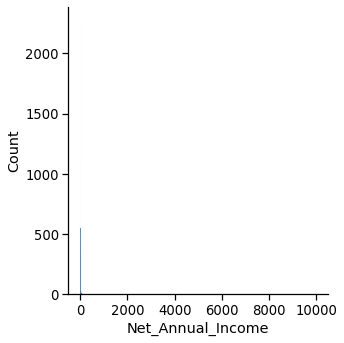

In [42]:
plt.figure(figsize=(12, 6))
sns.displot(df['Net_Annual_Income'])


In [43]:
income = df['Net_Annual_Income']
income.describe()

count     6716.000000
mean        60.954422
std        235.973454
min          0.001000
25%         20.000000
50%         36.000000
75%         36.000000
max      10000.000000
Name: Net_Annual_Income, dtype: float64

In [44]:
(income <= 1000).sum(), (income > 1000).sum()

(6687, 29)

La plupart des valeurs sont plus petites que 1000 mais certaines sont beaucoup plus grandes...

Regardons pour les revenus inférieurs à 100k

<Figure size 864x432 with 0 Axes>

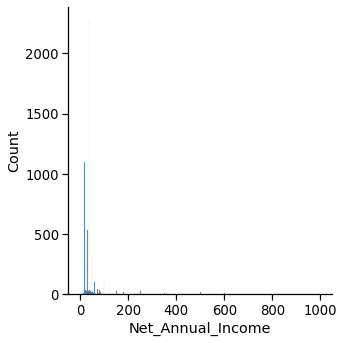

In [45]:
plt.figure(figsize=(12, 6))
sns.displot(df.loc[df['Net_Annual_Income']<=1000.]['Net_Annual_Income'])



On choisit de ne conserver que les données pour lesquelles le revenu est dans [10, 200]. On pourrait également remplacer les valeurs dépassant 200 par 200.

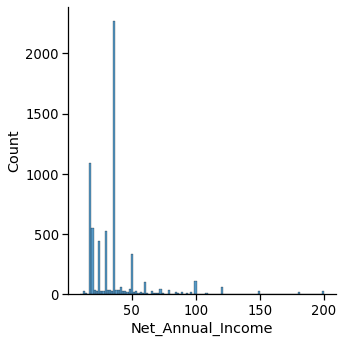

In [47]:
df = df[(df['Net_Annual_Income'] >= 10) & (df['Net_Annual_Income'] <= 200)]

sns.displot(df['Net_Annual_Income'])

# Un peu de visualisation avec `pandas` + `seaborn`

<AxesSubplot:xlabel='Educational_Level', ylabel='Net_Annual_Income'>

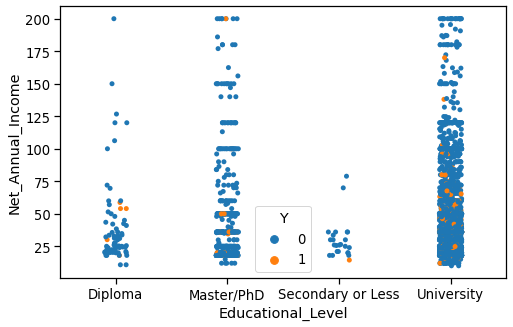

In [48]:
plt.figure(figsize=(8, 5))
sns.stripplot(x='Educational_Level', y='Net_Annual_Income', hue='Y', 
              jitter=True, data=df)

<AxesSubplot:xlabel='Educational_Level', ylabel='Net_Annual_Income'>

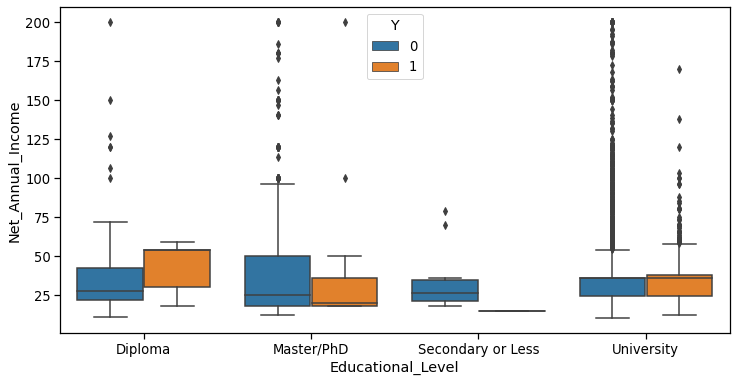

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Educational_Level', y='Net_Annual_Income', 
            hue='Y', data=df)

<AxesSubplot:xlabel='Marital_Status', ylabel='Net_Annual_Income'>

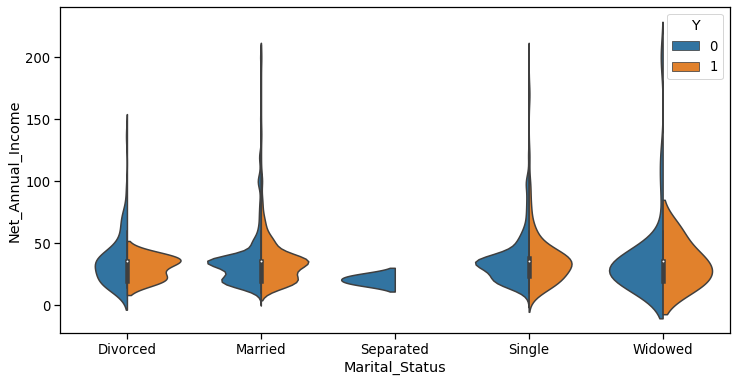

In [50]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Marital_Status', y='Net_Annual_Income', 
               hue='Y', split=True, data=df)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

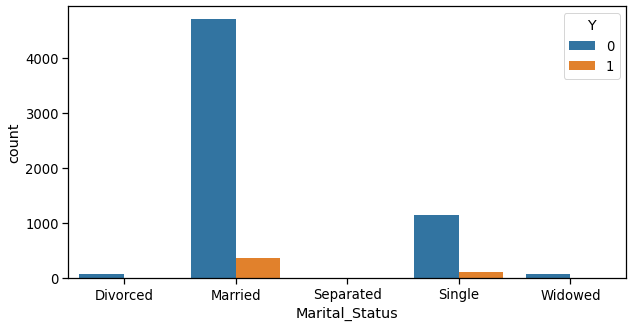

In [51]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Marital_Status', hue='Y', data=df)

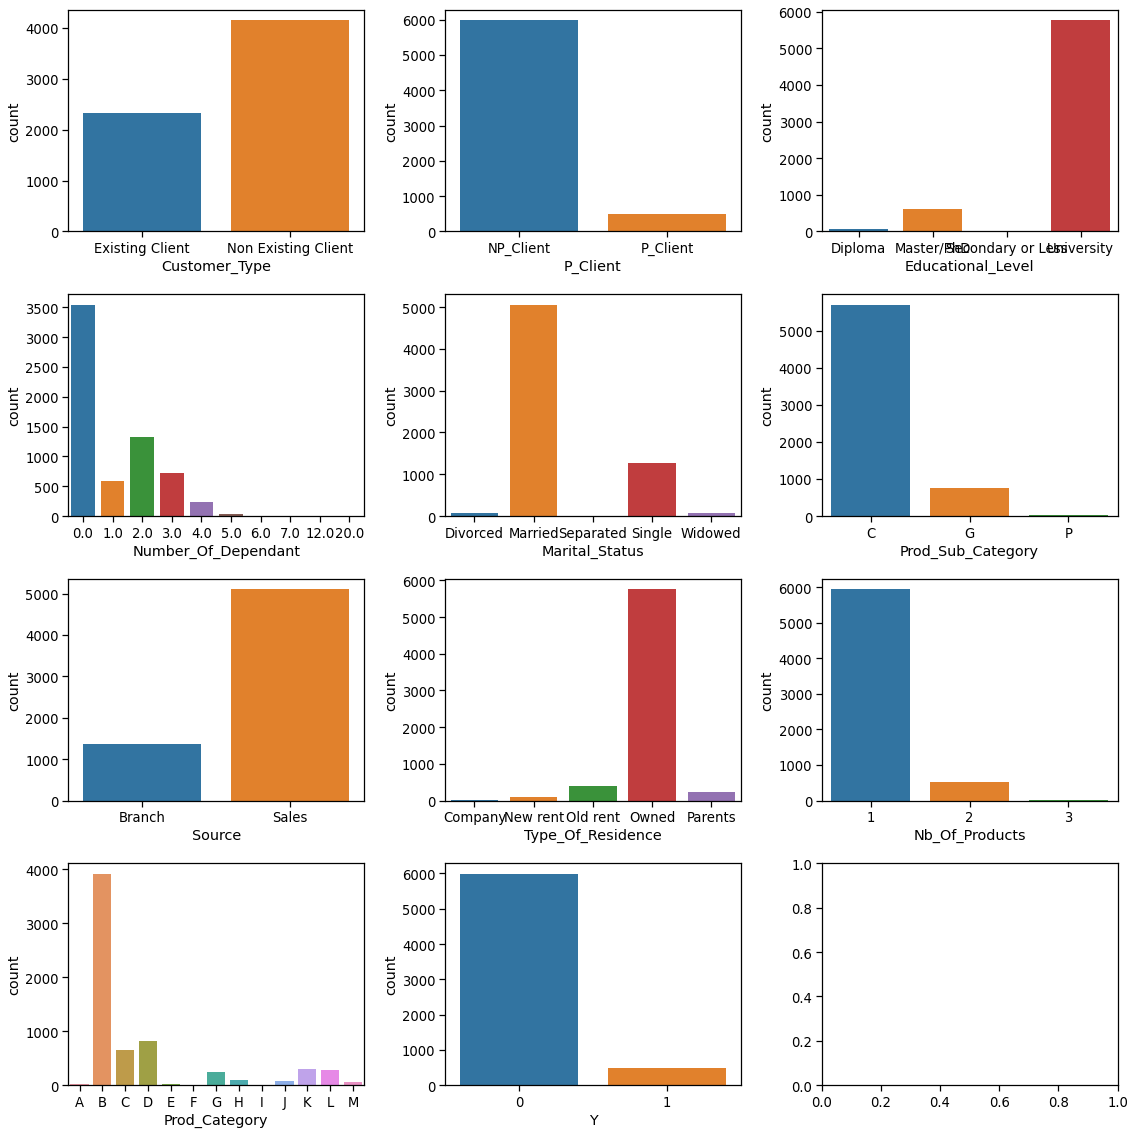

In [52]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 16))
columns = ['Customer_Type', 'P_Client', 'Educational_Level', 
           'Number_Of_Dependant', 'Marital_Status', 'Prod_Sub_Category',
           'Source', 'Type_Of_Residence', 'Nb_Of_Products', 
           'Prod_Category', 'Y']

for i, colname in enumerate(columns):
    sns.countplot(x=colname, data=df, ax=fig.axes[i])
plt.tight_layout()

# Préparation finale des données

On prépare des listes avec les noms des features catégorielles, dates, et continues

In [53]:

cnt_featnames = [
    'Years_At_Residence',
    'Net_Annual_Income',
    'Years_At_Business',
    'Number_Of_Dependant'
]

cat_featnames = [
    'Customer_Type',
    'P_Client',
    'Educational_Level',
    'Marital_Status',
    'Prod_Sub_Category',
    'Source',
    'Type_Of_Residence',
    'Prod_Category',
    'Nb_Of_Products'
]

date_featnames = [
    'BirthDate',
    'Customer_Open_Date',
    'Prod_Decision_Date'
    #'Prod_Closed_Date'
]

## On crée la matrice de design avec sklearn

Il faut 
- transformer les données date en âge, 
- transformer les features catégorielles en tableaux disjonctifs et 
- standardiser les features continues.

Attention à bien comprendre le code qui suit, c'est la bonne pratique pour préparer la matrice de design

In [55]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from pandas import Timestamp

# First we create a scikit-learn encoder that computes 
#  the age in days of columns containing dates
class AgeEncoder(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        self.today = Timestamp.today()
        return self

    def transform(self, X):
        return X.apply(lambda x: (x - self.today).dt.days, axis=0)

# Centers and reduces (variance=1) columns
standard_scaler = StandardScaler()

# One-hot encode, similar to pd.get_dummies
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)

# A pipeline that first computes age, and standardizes it
scaled_age_encoder = Pipeline([
    ('age', AgeEncoder()),
    ('scaling', StandardScaler())
])

# Let's combine all these transformations
transformer = ColumnTransformer([
    ('standard_scaling', standard_scaler, cnt_featnames),
    ('one_hot_encoding', one_hot_encoder, cat_featnames),
    ('dates_age_scaled', scaled_age_encoder, date_featnames)
])

gro_prep = transformer.fit_transform(df)

In [56]:
with open("gro_prep_array.pkl", 'wb') as f:
    pkl.dump(gro_prep, f)

Nous avons perdu le nom des variables, ce n'est pas grave pour de l'apprentissage pur. C'est une chose qui manque sur sklearn, on peut s'en sortir avec pandas mais ce n'est pas très élégant.

In [57]:
df_gro_prep = pd.DataFrame(gro_prep)

In [58]:
print(gro_prep.shape)
df_gro_prep.head()

(6473, 36)


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,-0.251937,-0.070473,-0.148677,1.483162,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.116527,0.452913,0.459772
1,-1.155534,-0.070473,-0.445207,1.483162,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.469771,0.477949,0.611862
2,-0.051138,-0.758766,-0.296942,-0.777377,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.189019,-0.530214,-0.971257
3,-0.251937,-0.070473,-0.445207,0.729649,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104618,0.497207,0.957521
4,-0.954735,-0.070473,-0.445207,1.483162,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.934602,0.312329,-0.909038


Les colonnes numériques ont été mise en premier, ensuite les tableaux disjonctifs des colonnes catégorielles, puis les dates transformées en âge

Je récupère les noms des tableaux disjonctifs via pandas (c'est là que ce n'est pas élégant)

In [59]:
noms_cat = pd.get_dummies(df[cat_featnames],prefix_sep='#', drop_first=True).columns
noms_cat.to_list()

['Nb_Of_Products',
 'Customer_Type#Non Existing Client',
 'P_Client#P_Client',
 'Educational_Level#Master/PhD',
 'Educational_Level#Secondary or Less',
 'Educational_Level#University',
 'Marital_Status#Married',
 'Marital_Status#Separated',
 'Marital_Status#Single',
 'Marital_Status#Widowed',
 'Prod_Sub_Category#G',
 'Prod_Sub_Category#P',
 'Source#Sales',
 'Type_Of_Residence#New rent',
 'Type_Of_Residence#Old rent',
 'Type_Of_Residence#Owned',
 'Type_Of_Residence#Parents',
 'Prod_Category#B',
 'Prod_Category#C',
 'Prod_Category#D',
 'Prod_Category#E',
 'Prod_Category#F',
 'Prod_Category#G',
 'Prod_Category#H',
 'Prod_Category#I',
 'Prod_Category#J',
 'Prod_Category#K',
 'Prod_Category#L',
 'Prod_Category#M']

In [60]:
df_gro_prep.columns = cnt_featnames + noms_cat.to_list() + date_featnames

In [61]:
df_gro_prep['Y'] = df['Y']
df_gro_prep.to_pickle("gro_prep_df.pkl")

# A faire
- pour les variables avec données manquantes (sauf `Prod_Closed_Date`), elles sont toutes numériques, on peut essayer d'imputer les valeurs manquantes en remplaçant les valeurs manquantes par la médiane (il y a d'autres solutions dans les variables sont catégorielles ou autre)
- pour la variable `Prod_Closed_Date`, créer une nouvelle variable qui indique si elle est manquante ou non
- ensuite faire les transformations des données comme dans préparation finale